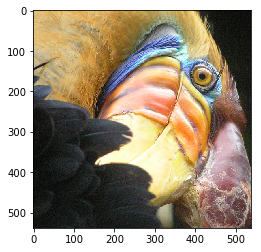

In [7]:
import matplotlib.pyplot as plt
try:
    import Image
except ImportError:
    from PIL import Image
from tqdm import tqdm
from utils import k_mean,find_k_features
import numpy as np
import cv2

im1 = Image.open('bird_large.tiff')
plt.imshow(im1)
plt.show()

In [8]:
k = 5
# k colors                
# low k make difference when we apply k-mean ++

100%|██████████| 4/4 [00:00<00:00, 82.89it/s]


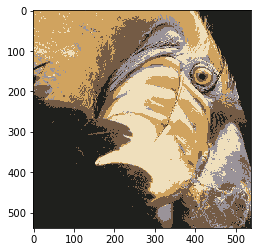

In [9]:
########        K_MEAN_PLUSPLUS      #########
photo = cv2.imread("bird_large.tiff")
origin_shape = photo.shape
photo = photo.reshape(-1,3) * 1.0
photo_k_mean_plus = k_mean(photo,k,plus=True)

###########################################################
#   in k_mean. i apply Vectorize(aspired by CS231n assignment 1)
#   , makes this faster! =)
###########################################################

photo_ok = photo_k_mean_plus.reshape(origin_shape)
k_photo = cv2.imwrite('after_k_plus.tiff',photo_ok)
im = Image.open('after_k_plus.tiff')
plt.imshow(im)
plt.show()

#############################################################
#   It will show 
#   100%|██████████| 4/4 [00:00<00:00, 74.92it/s]
#   that means I am generating K feature colors using K-mean++
#   You can check utils.py 
############################################################

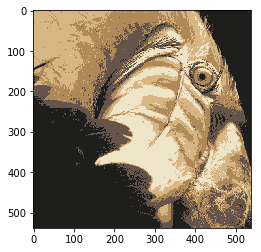

In [11]:
########        K_MEAN_CLASSIC      #########
photo = cv2.imread("bird_large.tiff")
origin_shape = photo.shape
photo = photo.reshape(-1,3) * 1.0
photo_k_mean = k_mean(photo,k,plus=False)
###########################################################
#   in k_mean. i apply Vectorize(aspired by CS231n assignment 1)
#   , makes this faster! =)
##########################################################

photo_ok2 = photo_k_mean.reshape(origin_shape)
k_photo = cv2.imwrite('after_k_classic.tiff',photo_ok2)
im = Image.open('after_k_classic.tiff')
plt.imshow(im)
plt.show()
#############################################################
#   As shown, low k with random choices is not good, but 
#   k-mean++ is good to handle this situation---> it has 
#   blue around eyes.
############################################################